In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import matplotlib.ticker as ticker
# import matplotlib.ticker as mtick
from scipy.stats import linregress
from sklearn import datasets
import scipy.stats as st

df = "Resources/COVID-19 Cases.csv"
pd.set_option('display.max_columns', None)
covid_data = pd.read_csv(df, low_memory=False)

In [2]:
covid_data.head()

,Case_Type,People_Total_Tested_Count,Cases,Difference,Date,Combined_Key,Country_Region,Province_State,Admin2,iso2,iso3,FIPS,Lat,Long,Population_Count,People_Hospitalized_Cumulative_Count,Data_Source,Prep_Flow_Runtime
0,Confirmed,NaN,0,0,2/3/2020,Switzerland,Switzerland,NaN,NaN,CH,CHE,NaN,46.8182,8.2275,8654618.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,4/28/2020 23:20
1,Deaths,NaN,0,0,3/1/2020,Cyprus,Cyprus,NaN,NaN,CY,CYP,NaN,35.1264,33.4299,1207361.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,4/28/2020 23:20
2,Confirmed,NaN,23,0,4/21/2020,Antigua and Barbuda,Antigua and Barbuda,NaN,NaN,AG,ATG,NaN,17.0608,-61.7964,97928.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,4/28/2020 23:20
3,Deaths,NaN,0,0,2/11/2020,Jamaica,Jamaica,NaN,NaN,JM,JAM,NaN,18.1096,-77.2975,2961161.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,4/28/2020 23:20
4,Confirmed,NaN,0,0,2/6/2020,Belize,Belize,NaN,NaN,BZ,BLZ,NaN,17.1899,-88.4976,397621.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,4/28/2020 23:20


In [3]:
list(covid_data)

['Case_Type',
 'People_Total_Tested_Count',
 'Cases',
 'Difference',
 'Date',
 'Combined_Key',
 'Country_Region',
 'Province_State',
 'Admin2',
 'iso2',
 'iso3',
 'FIPS',
 'Lat',
 'Long',
 'Population_Count',
 'People_Hospitalized_Cumulative_Count',
 'Data_Source',
 'Prep_Flow_Runtime']

In [4]:
#remove unwanted columns
columns_df = covid_data[['Case_Type', 'Date', 'Cases', 'Population_Count', 'People_Total_Tested_Count', 'People_Hospitalized_Cumulative_Count','Province_State','Admin2', 'Country_Region']]
columns_df.head()

,Case_Type,Date,Cases,Population_Count,People_Total_Tested_Count,People_Hospitalized_Cumulative_Count,Province_State,Admin2,Country_Region
0,Confirmed,2/3/2020,0,8654618.0,NaN,NaN,NaN,NaN,Switzerland
1,Deaths,3/1/2020,0,1207361.0,NaN,NaN,NaN,NaN,Cyprus
2,Confirmed,4/21/2020,23,97928.0,NaN,NaN,NaN,NaN,Antigua and Barbuda
3,Deaths,2/11/2020,0,2961161.0,NaN,NaN,NaN,NaN,Jamaica
4,Confirmed,2/6/2020,0,397621.0,NaN,NaN,NaN,NaN,Belize


In [5]:
list(columns_df)

['Case_Type',
 'Date',
 'Cases',
 'Population_Count',
 'People_Total_Tested_Count',
 'People_Hospitalized_Cumulative_Count',
 'Province_State',
 'Admin2',
 'Country_Region']

In [6]:
columns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689724 entries, 0 to 689723
Data columns (total 9 columns):
Case_Type                               689724 non-null object
Date                                    689724 non-null object
Cases                                   689724 non-null int64
Population_Count                        668948 non-null float64
People_Total_Tested_Count               1904 non-null float64
People_Hospitalized_Cumulative_Count    1904 non-null float64
Province_State                          654444 non-null object
Admin2                                  637980 non-null object
Country_Region                          689724 non-null object
dtypes: float64(3), int64(1), object(5)
memory usage: 47.4+ MB


In [7]:
# Create US dataframe
# Replace NaN with 0 in 'People_Total_Tested_Count' & 'People_Hospitalized_Cumulative_Count'
# Change Date from Object to DateTime
values = {'People_Total_Tested_Count': 0, 'People_Hospitalized_Cumulative_Count': 0}
us_df= columns_df.loc[columns_df['Country_Region']=='US']
us_df['Date']= pd.to_datetime(us_df['Date'])
us_df.fillna(value = values, inplace = True)

C:\Users\brian\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\brian\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [8]:
us_df

,Case_Type,Date,Cases,Population_Count,People_Total_Tested_Count,People_Hospitalized_Cumulative_Count,Province_State,Admin2,Country_Region
50215,Deaths,2020-04-19,0,13171.0,0.0,0.0,Kansas,Jackson,US
50216,Confirmed,2020-04-25,4,15026.0,0.0,0.0,Tennessee,Sequatchie,US
50217,Deaths,2020-04-10,0,20183.0,0.0,0.0,Mississippi,Wayne,US
50218,Deaths,2020-03-17,0,9947.0,0.0,0.0,Mississippi,Carroll,US
50219,Deaths,2020-03-07,0,7000.0,0.0,0.0,Texas,Bailey,US
...,...,...,...,...,...,...,...,...,...
689719,Confirmed,2020-01-22,0,43960.0,0.0,0.0,Ohio,Holmes,US
689720,Confirmed,2020-01-22,0,51054.0,0.0,0.0,Illinois,Grundy,US
689721,Confirmed,2020-01-22,0,12998.0,0.0,0.0,Alaska,Kodiak Island,US
689722,Confirmed,2020-01-22,0,12514.0,0.0,0.0,Texas,Rains,US


In [9]:
us_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 638960 entries, 50215 to 689723
Data columns (total 9 columns):
Case_Type                               638960 non-null object
Date                                    638960 non-null datetime64[ns]
Cases                                   638960 non-null int64
Population_Count                        618380 non-null float64
People_Total_Tested_Count               638960 non-null float64
People_Hospitalized_Cumulative_Count    638960 non-null float64
Province_State                          638960 non-null object
Admin2                                  637980 non-null object
Country_Region                          638960 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 48.7+ MB


In [10]:
us_df['Date']

50215    2020-04-19
50216    2020-04-25
50217    2020-04-10
50218    2020-03-17
50219    2020-03-07
            ...    
689719   2020-01-22
689720   2020-01-22
689721   2020-01-22
689722   2020-01-22
689723   2020-01-22
Name: Date, Length: 638960, dtype: datetime64[ns]

In [11]:
us_df['Province_State'].unique()

array(['Kansas', 'Tennessee', 'Mississippi', 'Texas', 'Indiana',
       'Florida', 'Georgia', 'Kentucky', 'South Dakota', 'Illinois',
       'Iowa', 'California', 'Wisconsin', 'North Carolina', 'Oregon',
       'Missouri', 'Oklahoma', 'Minnesota', 'Colorado', 'Alabama',
       'Michigan', 'Massachusetts', 'Ohio', 'Virginia', 'North Dakota',
       'Montana', 'Alaska', 'Pennsylvania', 'Nebraska', 'West Virginia',
       'New York', 'Arkansas', 'Puerto Rico', 'Washington', 'Vermont',
       'Connecticut', 'New Mexico', 'Utah', 'Louisiana', 'Idaho',
       'South Carolina', 'Nevada', 'Maryland', 'New Hampshire', 'Wyoming',
       'Delaware', 'Maine', 'New Jersey', 'Arizona', 'Rhode Island',
       'Hawaii', 'Guam', 'District of Columbia',
       'Northern Mariana Islands', 'American Samoa', 'Virgin Islands'],
      dtype=object)

In [12]:
# Confirmed CT in Texas (cumulative)
mask1 = us_df['Province_State']=='Texas'
mask2 = us_df['Case_Type']=='Confirmed'
mask3 = us_df['Date'] >= '03/01/2020'
mask4 = mask1 & mask2 & mask3
tx_df= us_df.loc[mask4].groupby(['Date']).sum()['Cases']
tx_df.head()

Date
2020-03-01    0
2020-03-02    0
2020-03-03    0
2020-03-04    0
2020-03-05    3
Name: Cases, dtype: int64

In [13]:
# Confirmed CT in New York (cumulative)
mask1 = us_df['Province_State']=='New York'
mask2 = us_df['Case_Type']=='Confirmed'
mask3 = us_df['Date'] >= '03/01/2020'
mask4 = mask1 & mask2 & mask3
ny_df= us_df.loc[mask4].groupby(['Date']).sum()['Cases']
ny_df.head()

Date
2020-03-01     0
2020-03-02     1
2020-03-03     2
2020-03-04    11
2020-03-05    23
Name: Cases, dtype: int64

In [14]:
# Confirmed CT in Other w/o NY (cumulative)
mask1 = us_df['Province_State']!='New York'
mask2 = us_df['Case_Type']=='Confirmed'
mask3 = us_df['Date'] >= '03/01/2020'
mask4 = mask1 & mask2 & mask3
other_df= us_df.loc[mask4].groupby(['Date']).sum()['Cases']
other_df.head()

Date
2020-03-01     30
2020-03-02     52
2020-03-03     71
2020-03-04     93
2020-03-05    149
Name: Cases, dtype: int64

In [15]:
# Confirmed CT in All States (cumulative)
mask1 = us_df['Country_Region'] =='US'
mask2 = us_df['Case_Type']=='Confirmed'
mask3 = us_df['Date'] >= '03/01/2020'
mask4 = mask1 & mask2 & mask3
all_df= us_df.loc[mask4].groupby(['Date']).sum()['Cases']
all_df.head()

Date
2020-03-01     30
2020-03-02     53
2020-03-03     73
2020-03-04    104
2020-03-05    172
Name: Cases, dtype: int64

In [16]:
# Add column for daily diff TX
daily_diff = tx_df.diff()
daily_diff.head()

Date
2020-03-01    NaN
2020-03-02    0.0
2020-03-03    0.0
2020-03-04    0.0
2020-03-05    3.0
Name: Cases, dtype: float64

In [17]:
# Add column for daily diff NY
ny_diff = ny_df.diff()
ny_diff.head()

Date
2020-03-01     NaN
2020-03-02     1.0
2020-03-03     1.0
2020-03-04     9.0
2020-03-05    12.0
Name: Cases, dtype: float64

In [18]:
other_diff = other_df.diff()
other_diff.head()

Date
2020-03-01     NaN
2020-03-02    22.0
2020-03-03    19.0
2020-03-04    22.0
2020-03-05    56.0
Name: Cases, dtype: float64

In [19]:
all_diff = all_df.diff()
all_diff.head()

Date
2020-03-01     NaN
2020-03-02    23.0
2020-03-03    20.0
2020-03-04    31.0
2020-03-05    68.0
Name: Cases, dtype: float64

In [41]:
daily_change = pd.DataFrame({'TX Diff' : daily_diff,
                            'NY Diff' : ny_diff,
                            'Other Diff' : other_diff,
                            'All Diff' : all_diff})
daily_change.fillna(0, inplace = True)
daily_change.reset_index()

,Date,TX Diff,NY Diff,Other Diff,All Diff
0,2020-03-01,0.0,0.0,0.0,0.0
1,2020-03-02,0.0,1.0,22.0,23.0
2,2020-03-03,0.0,1.0,19.0,20.0
3,2020-03-04,0.0,9.0,22.0,31.0
4,2020-03-05,3.0,12.0,56.0,68.0
5,2020-03-06,1.0,8.0,37.0,45.0
6,2020-03-07,4.0,45.0,74.0,119.0
7,2020-03-08,3.0,30.0,84.0,114.0
8,2020-03-09,2.0,36.0,28.0,64.0
9,2020-03-10,3.0,8.0,186.0,194.0


In [42]:
daily_change.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59 entries, 2020-03-01 to 2020-04-28
Data columns (total 4 columns):
TX Diff       59 non-null float64
NY Diff       59 non-null float64
Other Diff    59 non-null float64
All Diff      59 non-null float64
dtypes: float64(4)
memory usage: 2.3 KB


In [125]:
daily_change['All Diff'].max()

36188.0

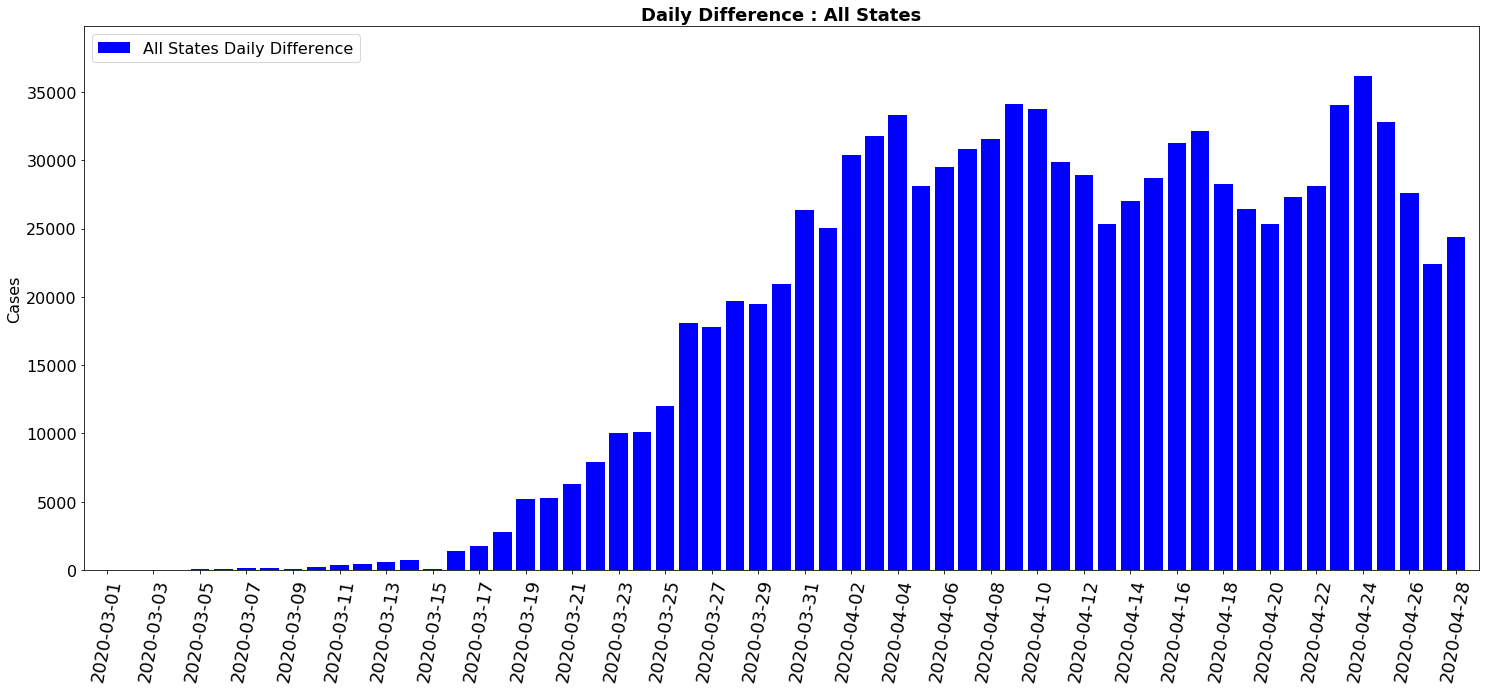

In [126]:
dailyDiff = daily_change['All Diff']
dates = daily_change.index.values
plt.figure(figsize=(25,10))
plt.bar(dates, dailyDiff, alpha=1, color = 'blue', align="center", label = "All States Daily Difference" )
plt.margins(0.01, 0.1)
plt.rcParams.update({'font.size': 16})
# plt.xticks(rotation = 90)
plt.xticks(dates[::2], rotation=80, fontsize = 18) # set divisor
plt.locator_params(axis= 'dates', nbins=len(dates)/2)  # set divisor 
plt.legend(loc = 'upper left')
plt.title("Daily Difference : All States", fontsize = 18, weight = 'bold')
plt.ylabel("Cases", fontsize = 16)
plt.show()

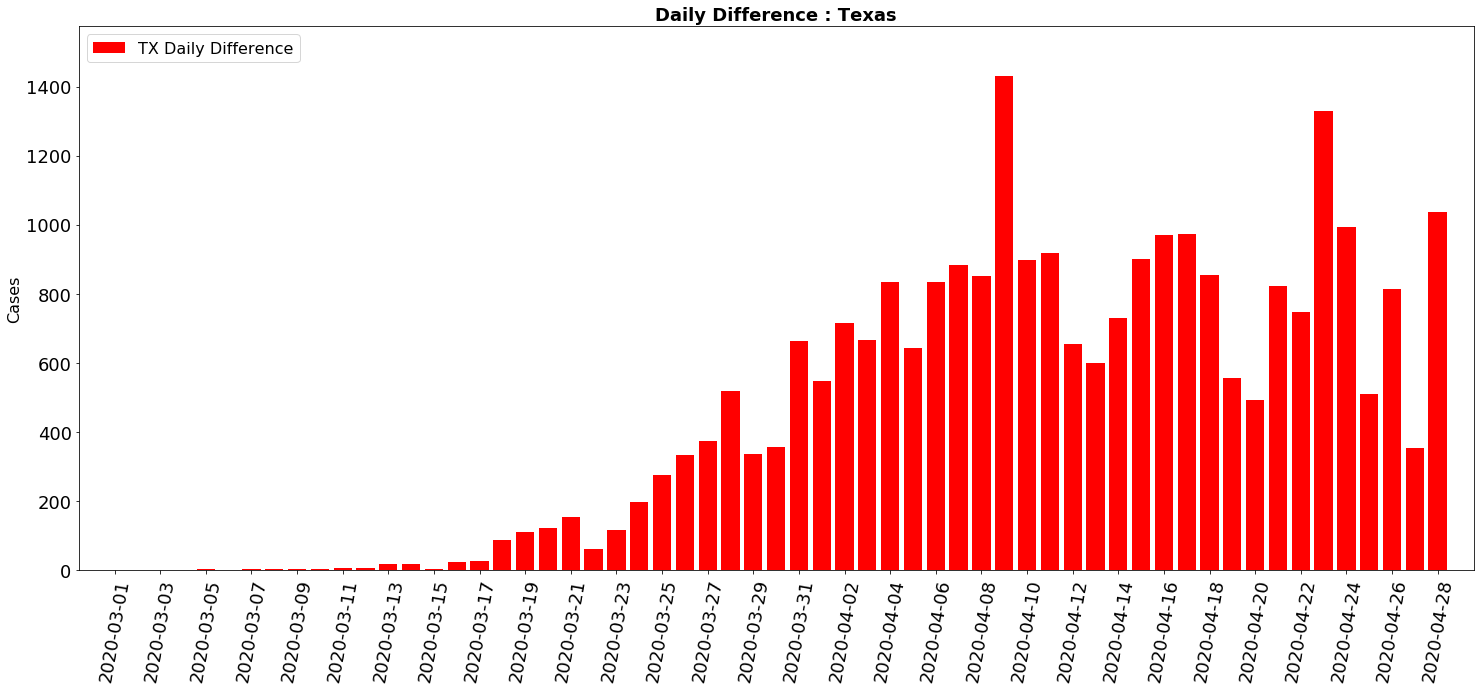

In [134]:
txDiff = daily_change['TX Diff']
dates = daily_change.index.values
plt.figure(figsize=(25,10))
plt.bar(dates, daily_change['TX Diff'], color='r', alpha=1, align="center", label = "TX Daily Difference")
plt.margins(0.02, 0.1)
plt.rcParams.update({'font.size': 16})
# plt.xticks(rotation = 90)
plt.xticks(dates[::2], rotation= 80, fontsize = 18) # set divisor
plt.locator_params(axis= 'dates', nbins=len(dates)/2)  # set divisor
plt.yticks(fontsize = 18)
plt.legend(loc = 'upper left')
plt.title("Daily Difference : Texas", fontsize = 18, weight = 'bold')
plt.ylabel("Cases", fontsize = 16)
plt.show()

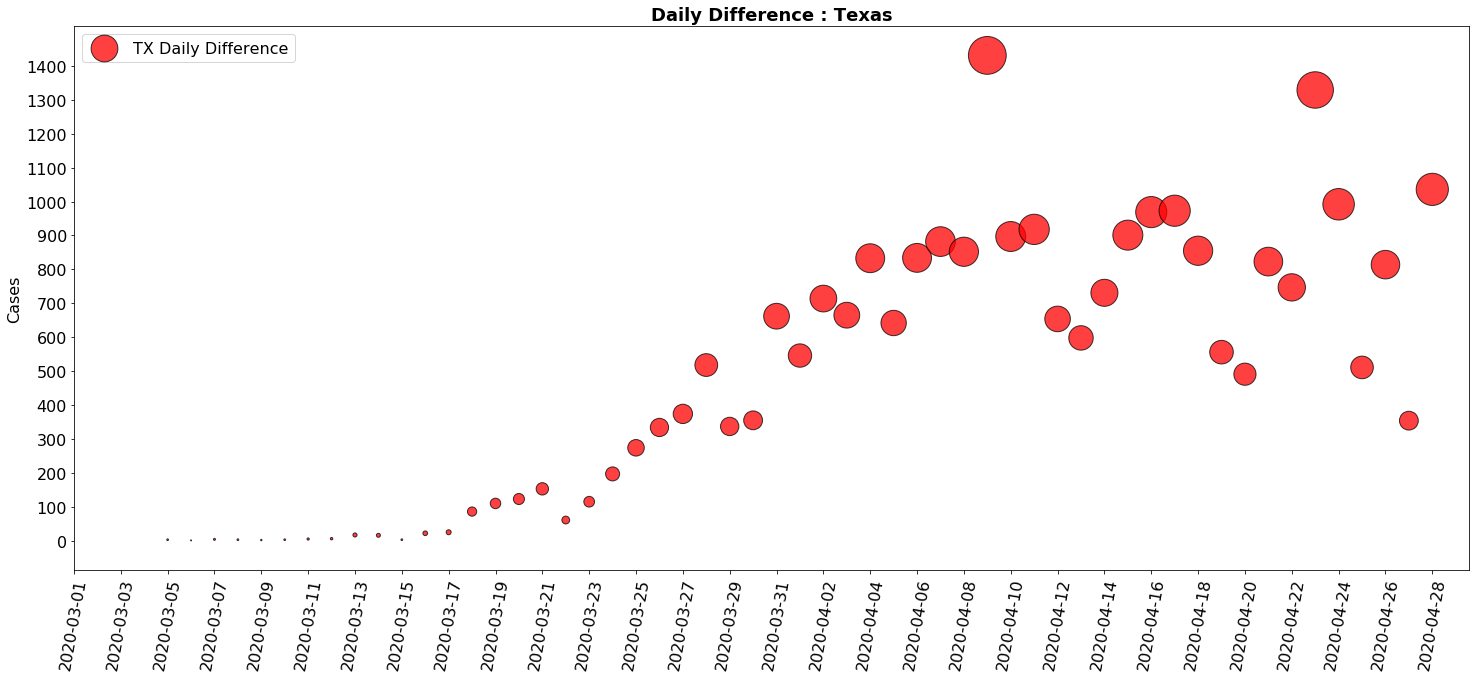

In [24]:
dates = daily_change.index.values
plt.figure(figsize=(25,10))
plt.scatter(dates, daily_change['TX Diff'], marker="o", facecolors="red", edgecolors="black", s=daily_change['TX Diff'], alpha=0.75, label = "TX Daily Difference")
y_ticks = np.arange(0, max(daily_change['TX Diff']), 100)
plt.yticks(y_ticks)
plt.margins(-0.37, 0.06)
plt.rcParams.update({'font.size': 16})
# plt.xticks(rotation = 90)
plt.xticks(dates[::2], rotation= 80) # set divisor
plt.legend(loc = 'upper left')
plt.title("Daily Difference : Texas", fontsize = 18, weight = 'bold')
plt.ylabel("Cases", fontsize = 16)
plt.show()

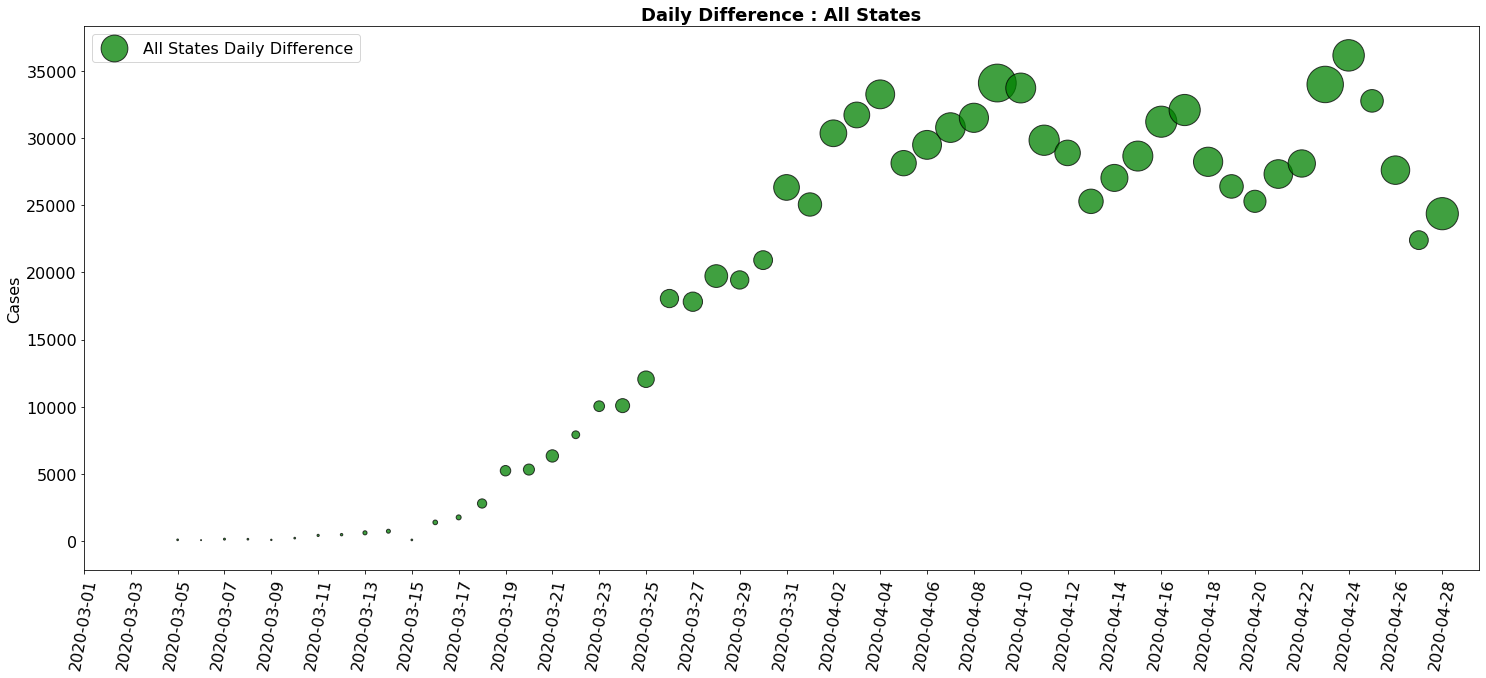

In [25]:
dates = daily_change.index.values
plt.figure(figsize=(25,10))
plt.scatter(dates, daily_change['All Diff'], marker="o", facecolors="green", edgecolors="black", s=daily_change['TX Diff'], alpha=0.75, label = "All States Daily Difference")
y_ticks = np.arange(0, max(daily_change['All Diff']), 5000)
plt.yticks(y_ticks)
plt.margins(-0.37, 0.06)
plt.rcParams.update({'font.size': 16})
# plt.xticks(rotation = 90)
plt.xticks(dates[::2], rotation= 80) # set divisor
plt.legend(loc = 'upper left')
plt.title("Daily Difference : All States", fontsize = 18, weight = 'bold')
plt.ylabel("Cases", fontsize = 16)
plt.show()

The r-squared is: 0.8737698067617065


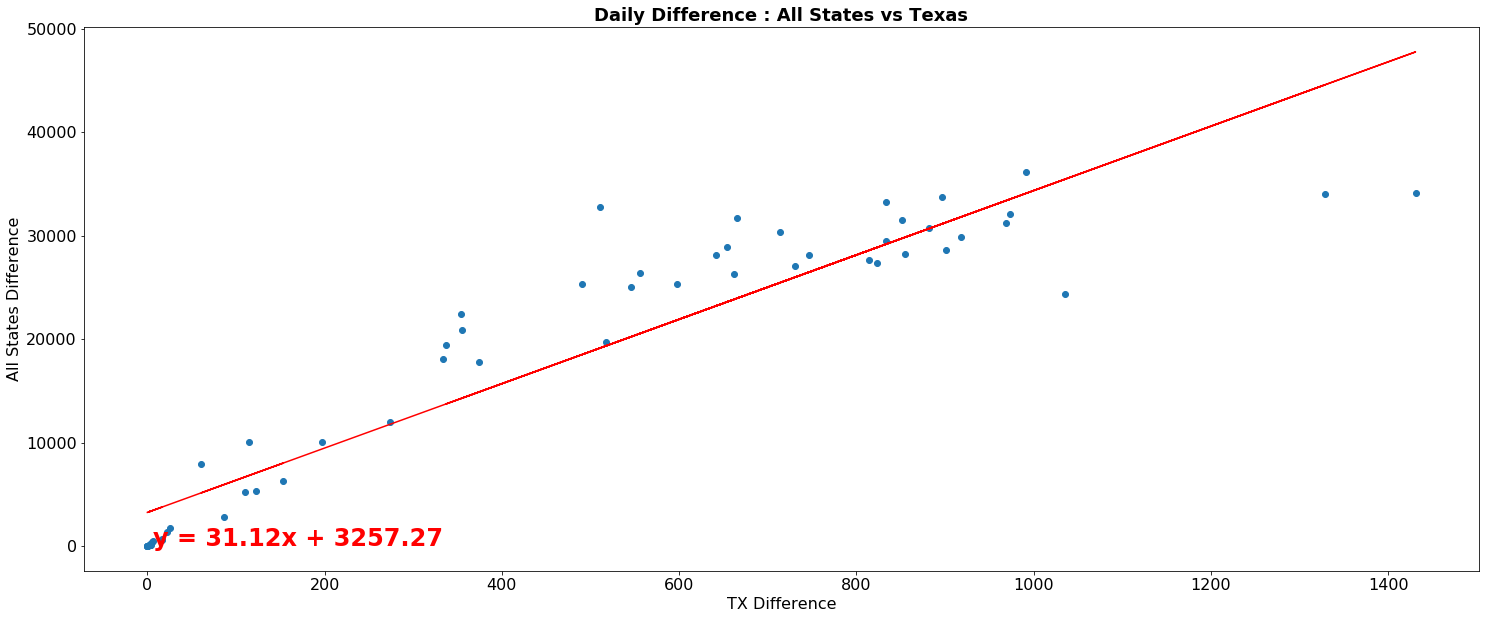

In [26]:
# Add the linear regression equation and line to plot
x_values = daily_change['TX Diff']
y_values = daily_change['All Diff']
plt.figure(figsize=(25,10))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=24,color="red", weight = 'bold')
plt.title("Daily Difference : All States vs Texas", fontsize = 18, weight = 'bold')
plt.xlabel('TX Difference')
plt.ylabel('All States Difference')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [27]:
correlation = st.pearsonr(daily_change['All Diff'],daily_change['TX Diff'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.93


The r-squared is: 0.8888155342222323


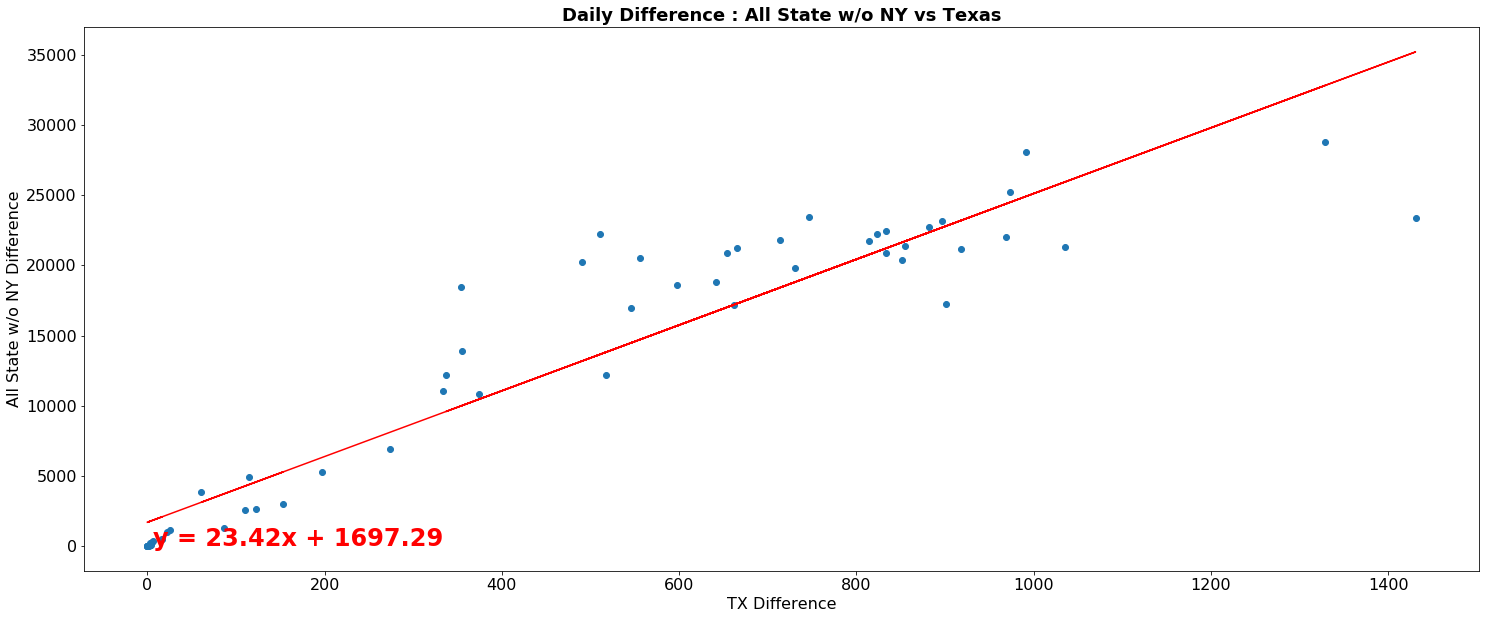

In [49]:
# Add the linear regression equation and line to plot
x_values = daily_change['TX Diff']
y_values = daily_change['Other Diff']
plt.figure(figsize=(25,10))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=24,color="red", weight = 'bold')
plt.title("Daily Difference : All State w/o NY vs Texas", fontsize = 18, weight = 'bold')
plt.xlabel('TX Difference')
plt.ylabel('All State w/o NY Difference')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [50]:
correlation = st.pearsonr(daily_change['Other Diff'],daily_change['TX Diff'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.94


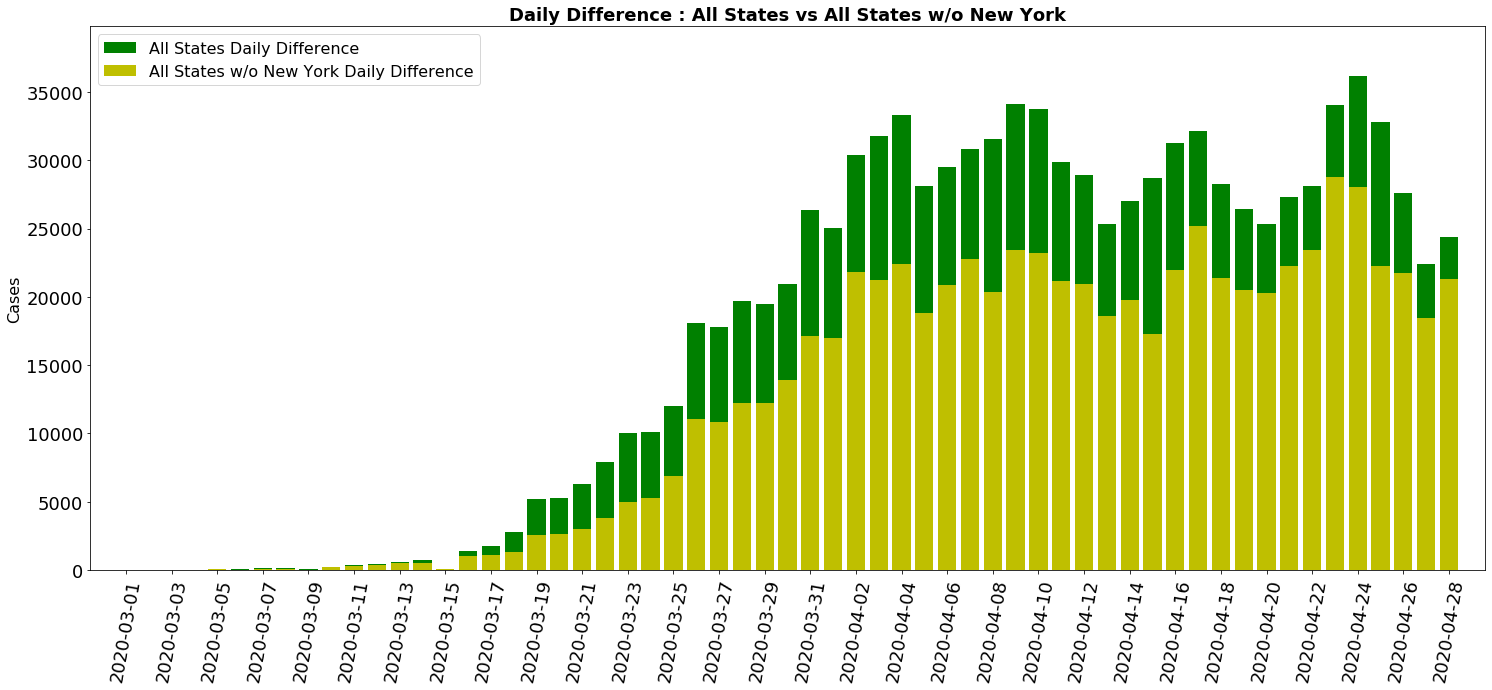

In [175]:
dates = daily_change.index.values
plt.figure(figsize=(25,10))
plt.bar(dates, daily_change['All Diff'], color='g', alpha=1, align="center", label = "All States Daily Difference")
plt.bar(dates, daily_change['Other Diff'], color='y', alpha=1, align="center", label = "All States w/o New York Daily Difference")
plt.margins(0.02, 0.1)
plt.rcParams.update({'font.size': 16})
# plt.xticks(rotation = 90)
plt.xticks(dates[::2], rotation= 80, fontsize = 18) # set divisor
plt.locator_params(axis= 'dates', nbins=len(dates)/2)  # set divisor 
plt.yticks(fontsize = 18)
plt.legend(loc = 'upper left')
plt.title("Daily Difference : All States vs All States w/o New York", fontsize = 18, weight = 'bold')
plt.ylabel("Cases", fontsize = 16)
plt.show()

In [29]:
daily_change = pd.DataFrame({'TX Diff' : daily_diff,
                            'NY Diff' : ny_diff,
                            'Other Diff' : other_diff})
daily_change.fillna(0, inplace = True)
daily_change.reset_index()

,Date,TX Diff,NY Diff,Other Diff
0,2020-03-01,0.0,0.0,0.0
1,2020-03-02,0.0,1.0,22.0
2,2020-03-03,0.0,1.0,19.0
3,2020-03-04,0.0,9.0,22.0
4,2020-03-05,3.0,12.0,56.0
5,2020-03-06,1.0,8.0,37.0
6,2020-03-07,4.0,45.0,74.0
7,2020-03-08,3.0,30.0,84.0
8,2020-03-09,2.0,36.0,28.0
9,2020-03-10,3.0,8.0,186.0


In [30]:
daily_change.index

DatetimeIndex(['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
               '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
               '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16',
               '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
               '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
               '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28',
               '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01',
               '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05',
               '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09',
               '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13',
               '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17',
               '2020-04-18', '2020-04-19', '2020-04-20', '2020-04-21',
               '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-25',
      

In [31]:
# Add column for daily change % TX
daily_pct = tx_df.pct_change()

In [32]:
# Add column for daily change % NY
ny_pct = ny_df.pct_change()

In [33]:
# Add column for daily change % Other
other_pct = other_df.pct_change()

In [34]:
all_pct = all_df.pct_change()

In [35]:
daily_pctchange = pd.DataFrame({'TX %Chnge' : daily_pct,
                            'NY %Chnge' : ny_pct,
                            'Other %Chnge' : other_pct,
                               'All States %Chnge' : all_pct})
daily_pctchange = daily_pctchange.replace([np.inf, -np.inf], np.nan)
daily_pctchange.fillna(0, inplace = True)
daily_pctchange.reset_index()
pd.set_option('display.max_rows', None)
print(daily_pctchange)

            TX %Chnge  NY %Chnge  Other %Chnge  All States %Chnge
Date                                                             
2020-03-01   0.000000   0.000000      0.000000           0.000000
2020-03-02   0.000000   0.000000      0.733333           0.766667
2020-03-03   0.000000   1.000000      0.365385           0.377358
2020-03-04   0.000000   4.500000      0.309859           0.424658
2020-03-05   0.000000   1.090909      0.602151           0.653846
2020-03-06   0.333333   0.347826      0.248322           0.261628
2020-03-07   1.000000   1.451613      0.397849           0.548387
2020-03-08   0.375000   0.394737      0.323077           0.339286
2020-03-09   0.181818   0.339623      0.081395           0.142222
2020-03-10   0.230769   0.056338      0.500000           0.377432
2020-03-11   0.312500   0.466667      0.586022           0.560734
2020-03-12   0.285714   0.486364      0.389831           0.409050
2020-03-13   0.629630   0.287462      0.403252           0.378934
2020-03-14

In [183]:
daily_pctchange['Other %Chnge'].mean()

0.19729465038245975

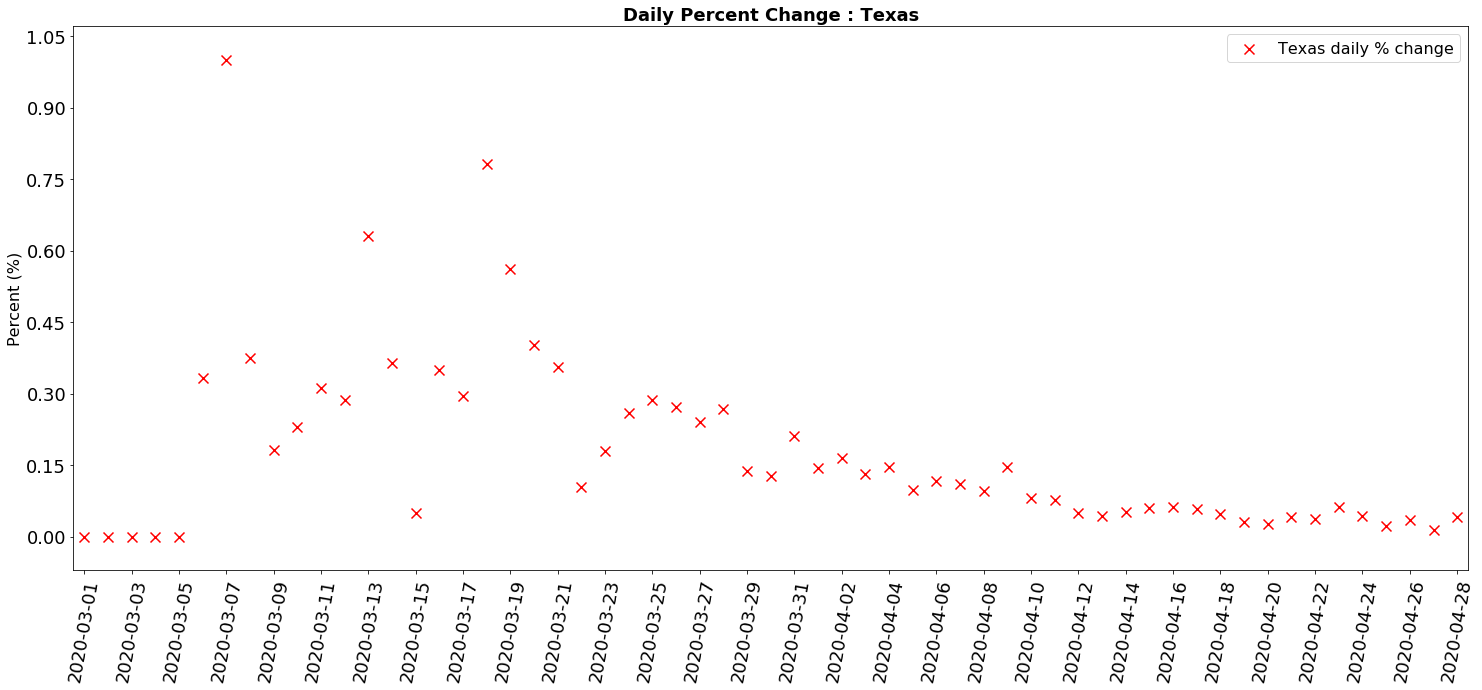

In [202]:
dates = daily_change.index.values
plt.figure(figsize=(25,10))
plt.scatter(dates, daily_pctchange['TX %Chnge'], marker="x", s = 100, facecolors="red", edgecolors="black", alpha=1, label = "Texas daily % change")
y_ticks = np.arange(0, 5, 0.15)
plt.yticks(y_ticks, fontsize = 18)
plt.margins(-0.15, 0.06)
plt.rcParams.update({'font.size': 16})
# plt.xticks(rotation = 90)
plt.xticks(dates[::2], rotation= 80, fontsize = 18) # set divisor
plt.legend(loc = 'upper right')
plt.title("Daily Percent Change : Texas", fontsize = 18, weight = 'bold')
plt.ylabel("Percent (%)", fontsize = 16)
plt.show()

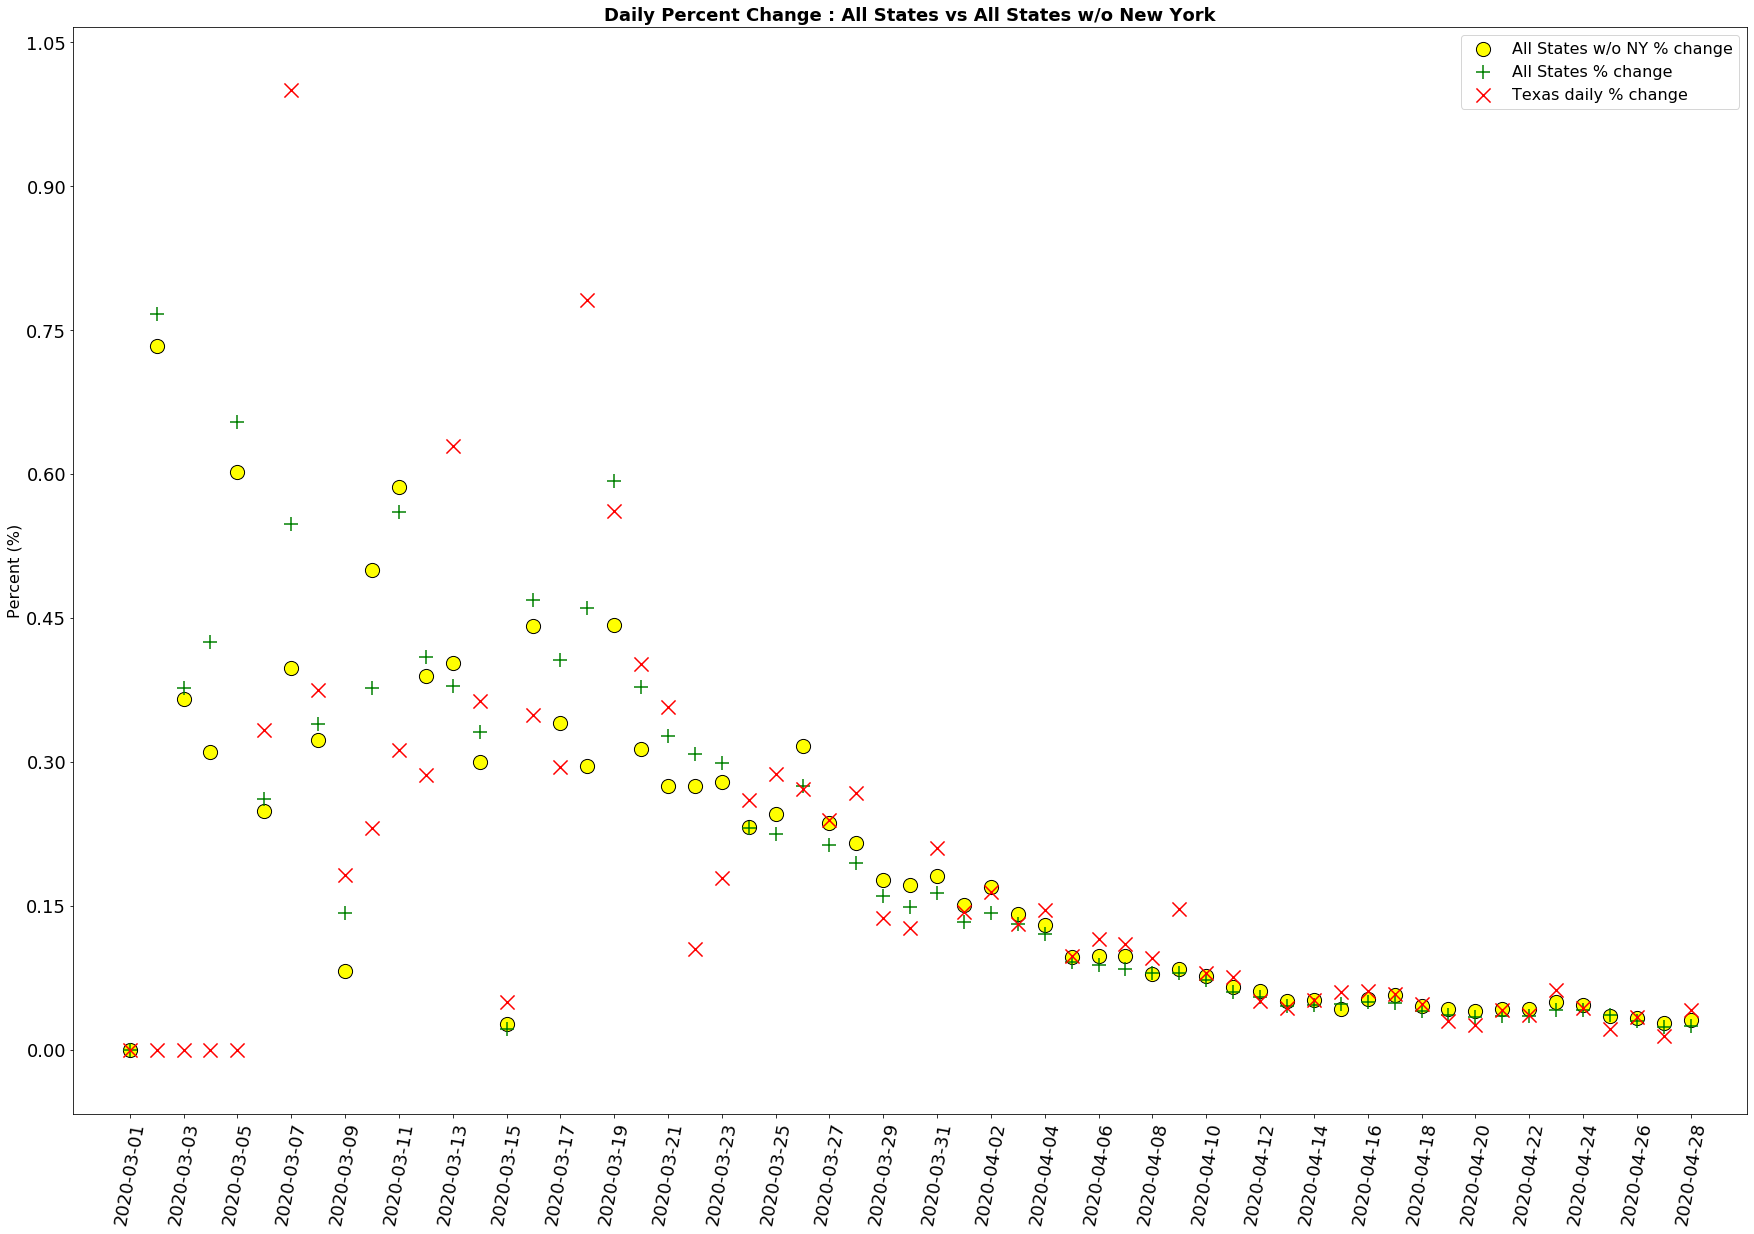

In [171]:
dates = daily_change.index.values
plt.figure(figsize=(30,20))
plt.scatter(dates, daily_pctchange['Other %Chnge'], marker="o", s = 200, facecolors="yellow", edgecolors="black", alpha=1, label = "All States w/o NY % change")
plt.scatter(dates, daily_pctchange['All States %Chnge'], marker="+", s = 200, facecolors="green", alpha=1, label = "All States % change")
plt.scatter(dates, daily_pctchange['TX %Chnge'], marker="x", s = 200, facecolors="red", edgecolors="black", alpha=1, label = "Texas daily % change")
y_ticks = np.arange(0, 5, 0.15)
plt.yticks(y_ticks, fontsize = 18)
plt.margins(-0.15, 0.06)
plt.rcParams.update({'font.size': 16})
# plt.xticks(rotation = 90)
plt.xticks(dates[::2], rotation= 80, fontsize = 18) # set divisor
plt.legend(loc = 'upper right')
plt.title("Daily Percent Change : All States vs All States w/o New York", fontsize = 18, weight = 'bold')
plt.ylabel("Percent (%)", fontsize = 16)
plt.show()

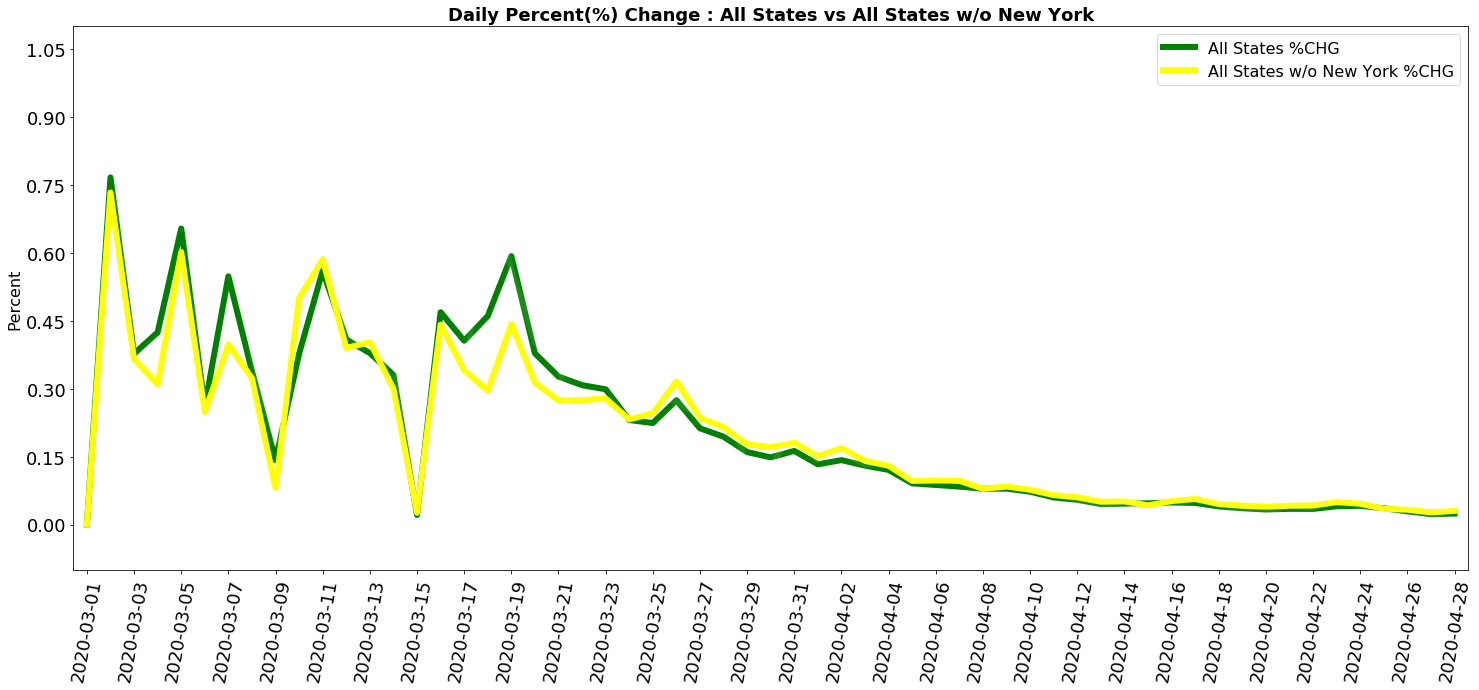

In [200]:
plt.figure(figsize=(25,10))
plt.plot(daily_pctchange['All States %Chnge'], lw = 6, color = 'green', label = 'All States %CHG')
plt.plot(daily_pctchange['Other %Chnge'], lw = 6, color = 'yellow', label = 'All States w/o New York %CHG')
plt.plot(daily_pctchange['TX %Chnge'], lw = 6, color = 'white', alpha = 0.1)
y_ticks = np.arange(0, 5, 0.15)
plt.yticks(y_ticks, fontsize = 18)
plt.margins(0.01, 0.1)
plt.rcParams.update({'font.size': 16})
# plt.xticks(rotation = 90)
plt.xticks(dates[::2], rotation= 80, fontsize = 18) # set divisor
plt.locator_params(axis= 'dates', nbins=len(dates)/2)  # set divisor 
plt.legend(loc = 'upper right')
plt.title("Daily Percent(%) Change : All States vs All States w/o New York", fontsize = 18, weight = 'bold')
plt.ylabel("Percent", fontsize = 16)
plt.show()

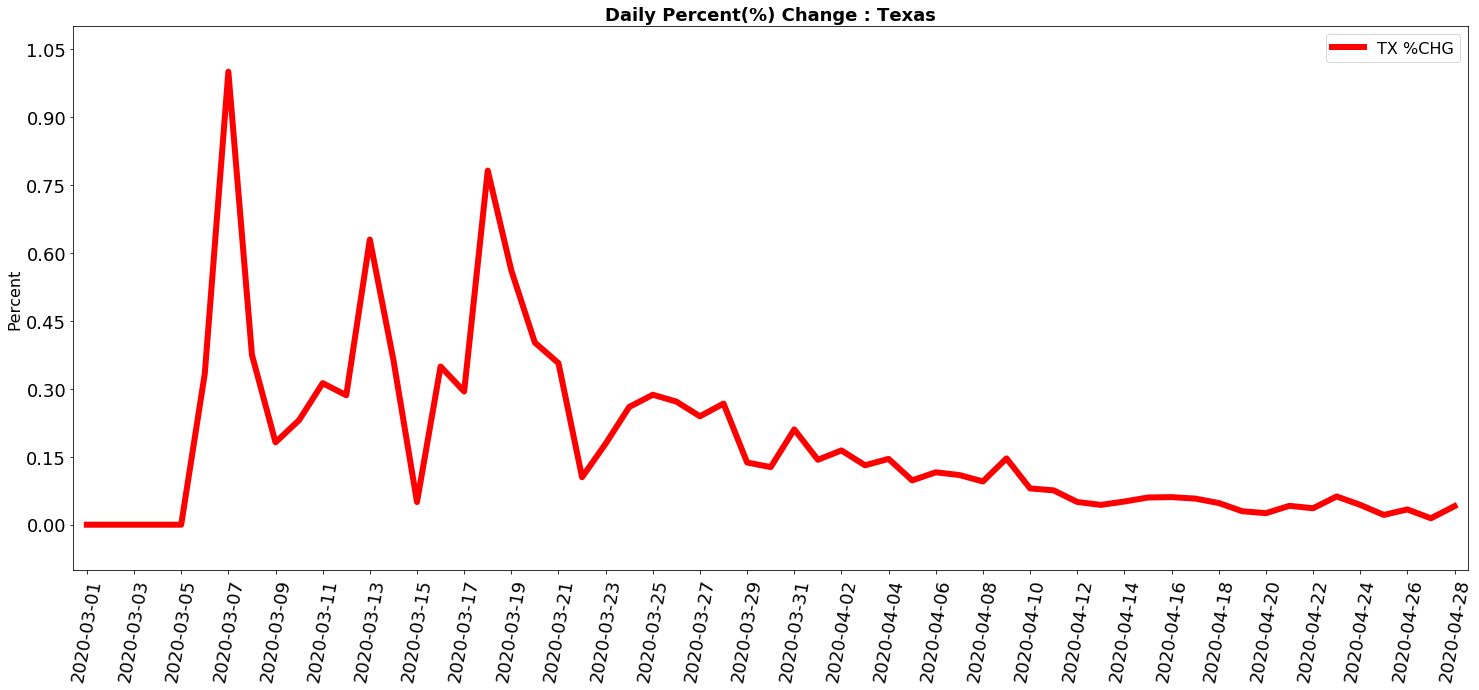

In [199]:
plt.figure(figsize=(25,10))
plt.plot(daily_pctchange['TX %Chnge'], lw = 6, color = 'red', label = 'TX %CHG')
y_ticks = np.arange(0, 6, 0.15)
plt.yticks(y_ticks, fontsize = 18)
plt.margins(0.01, 0.1)
plt.rcParams.update({'font.size': 16})
# plt.xticks(rotation = 90)
plt.xticks(dates[::2], rotation= 80, fontsize = 18) # set divisor
plt.locator_params(axis= 'dates', nbins=len(dates)/2)  # set divisor 
plt.legend(loc = 'upper right')
plt.title("Daily Percent(%) Change : Texas", fontsize = 18, weight = 'bold')
plt.ylabel("Percent", fontsize = 16)
plt.show()

In [38]:
# Add the linear regression equation and line to plot
x_values = daily_pctchange['All States %Chnge']
y_values = daily_pctchange['TX %Chnge']
plt.figure(figsize=(25,10))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=24,color="red", weight = 'bold')
plt.title("Daily Difference : All States vs Texas", fontsize = 18, weight = 'bold')
plt.xlabel('TX Difference')
plt.ylabel('All States Difference')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.31603651342166456


In [39]:
correlation = st.pearsonr(daily_pctchange['All States %Chnge'],daily_pctchange['TX %Chnge'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.56


In [48]:
# Add the linear regression equation and line to plot
x_values = daily_pctchange['Other %Chnge']
y_values = daily_pctchange['TX %Chnge']
plt.figure(figsize=(25,10))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=24,color="red", weight = 'bold')
plt.title("Daily Difference : All States vs Texas", fontsize = 18, weight = 'bold')
plt.xlabel('TX Difference')
plt.ylabel('All States Difference')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.23225487366309475


In [47]:
correlation = st.pearsonr(daily_pctchange['Other %Chnge'],daily_pctchange['TX %Chnge'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.48


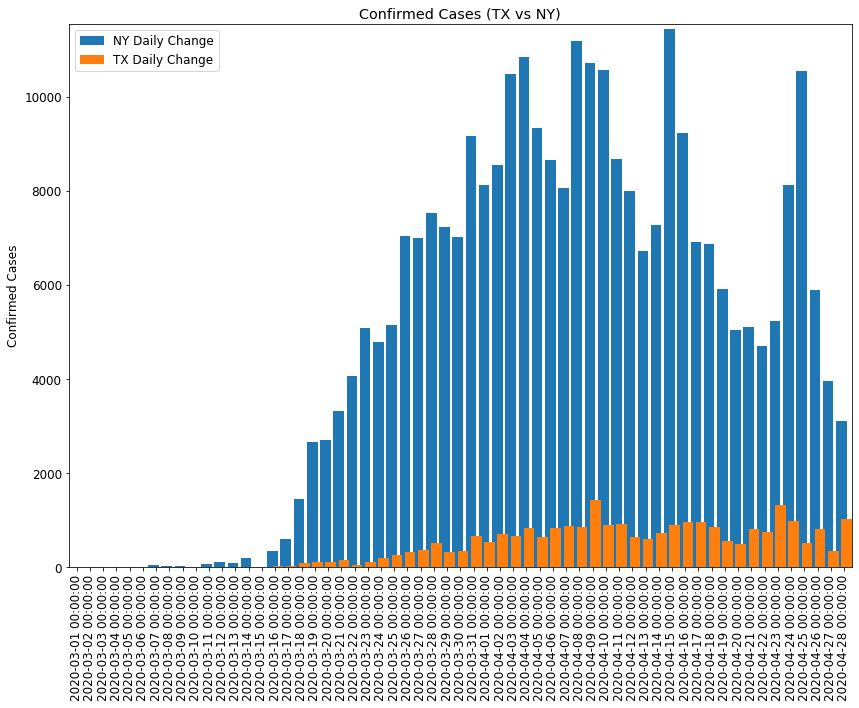

In [186]:
N = 59
dates = daily_change.index

ind = np.arange(N) 
width = 0.4
plt.figure(figsize=(25,10))
plt.bar(ind, daily_change['NY Diff'], label='NY Daily Change')
plt.bar(ind + width, daily_change['TX Diff'], label='TX Daily Change')
plt.margins(0.01, 0.01)
plt.rcParams.update({'font.size': 12})
plt.xticks(rotation = "vertical")
plt.xticks(ind + width / 2, dates)
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.2 # inch margin
s = maxsize/plt.gcf().dpi*N+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])

plt.ylabel('Confirmed Cases')
plt.title('Confirmed Cases (TX vs NY)')


plt.legend(loc='best')
plt.show()

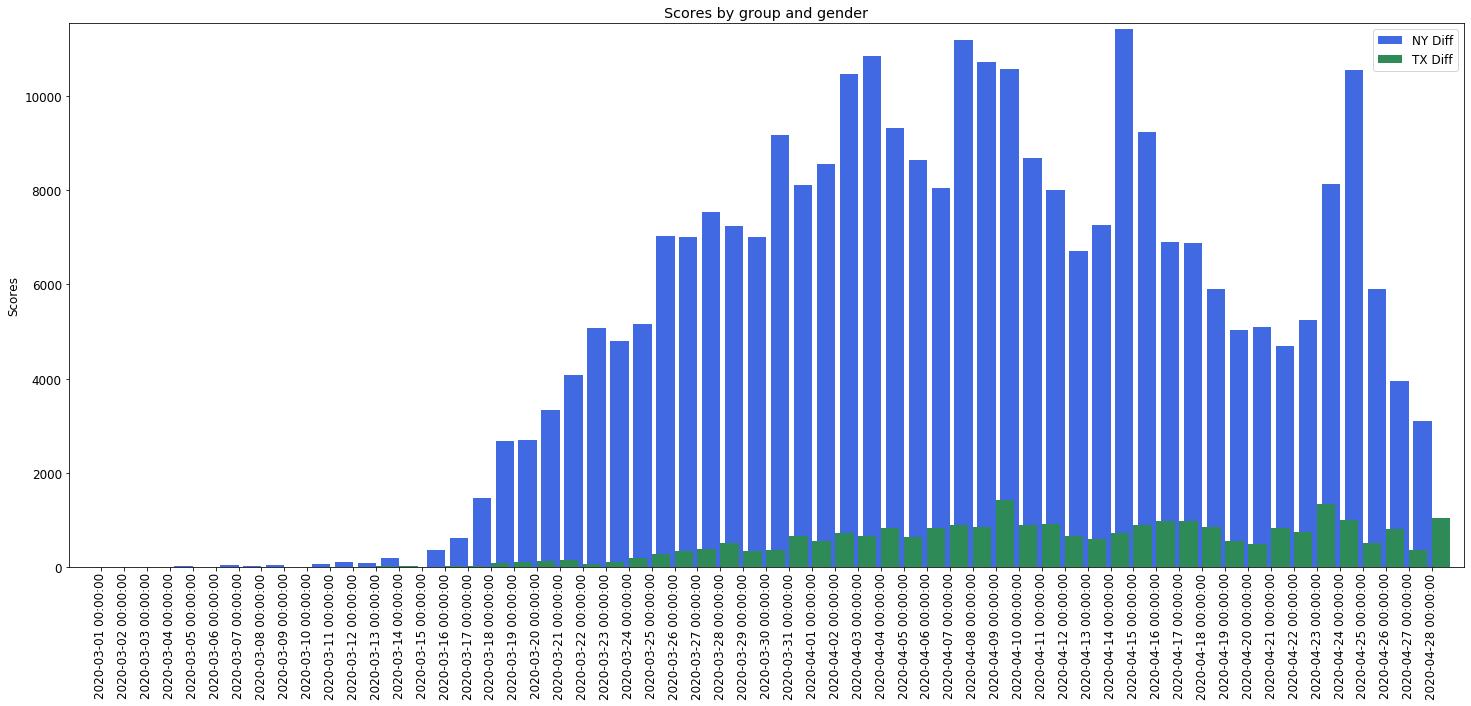

In [176]:
N = 59
dates = daily_change.index

ind = np.arange(N)  # the x locations for the groups
width = 0.8       # the width of the bars

fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)
ax.margins(0.01,0.01)
rects1 = ax.bar(ind, daily_change['NY Diff'], width, color='royalblue')
rects2 = ax.bar(ind+width, daily_change['TX Diff'], width, color='seagreen')

# add some
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(dates,  rotation="vertical")
ax.tick_params(axis = 'x', pad = 2)

ax.legend( (rects1[0], rects2[0]), ('NY Diff', 'TX Diff') )

plt.show()

In [291]:
# Create function to run for all states

In [120]:
N

numpy.datetime64('2020-04-28T00:00:00.000000000')

In [83]:
dates

DatetimeIndex(['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
               '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
               '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16',
               '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
               '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
               '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28',
               '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01',
               '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05',
               '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09',
               '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13',
               '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17',
               '2020-04-18', '2020-04-19', '2020-04-20', '2020-04-21',
               '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-25',
      

In [279]:
def makescrap(state):
    mask1 = us_df['Province_State']== f"{state}"
    mask2 = us_df['Case_Type']=='Confirmed'
    mask3 = mask1 & mask2
    print(mask3)

In [309]:
def makemask(state):
    mask1 = us_df['Province_State']== f"{state}"
    mask2 = us_df['Case_Type']=='Confirmed'
    mask3 = mask1 & mask2
    state_df =  us_df.loc[mask3].groupby(['Date']).sum()['Cases']
    daily_diff = state_df.diff()
    daily_change2 = pd.DataFrame({'Daily Diff' : daily_diff})
    dailyDiff = daily_change2['Daily Diff']
    date = state_df.index.values
    plt.figure(figsize=(25,10))
    dailyDiff_bar = plt.bar(date, dailyDiff, color='r', alpha=0.5, align="center")
    plt.margins(0.01, 0.1)
    plt.title(f"{state}")
    plt.rcParams.update({'font.size': 12})
#     plt.xticks(rotation = 90)
    plt.xticks(dates[::2], rotation='vertical') # set divisor
    plt.locator_params(axis= 'dates', nbins=len(dates)/2)  # set divisor 
    plt.show()

In [310]:
states = us_df["Province_State"][0:10].unique()
states

array(['Kansas', 'Tennessee', 'Mississippi', 'Texas', 'Indiana',
       'Florida', 'Georgia', 'Kentucky', 'South Dakota'], dtype=object)

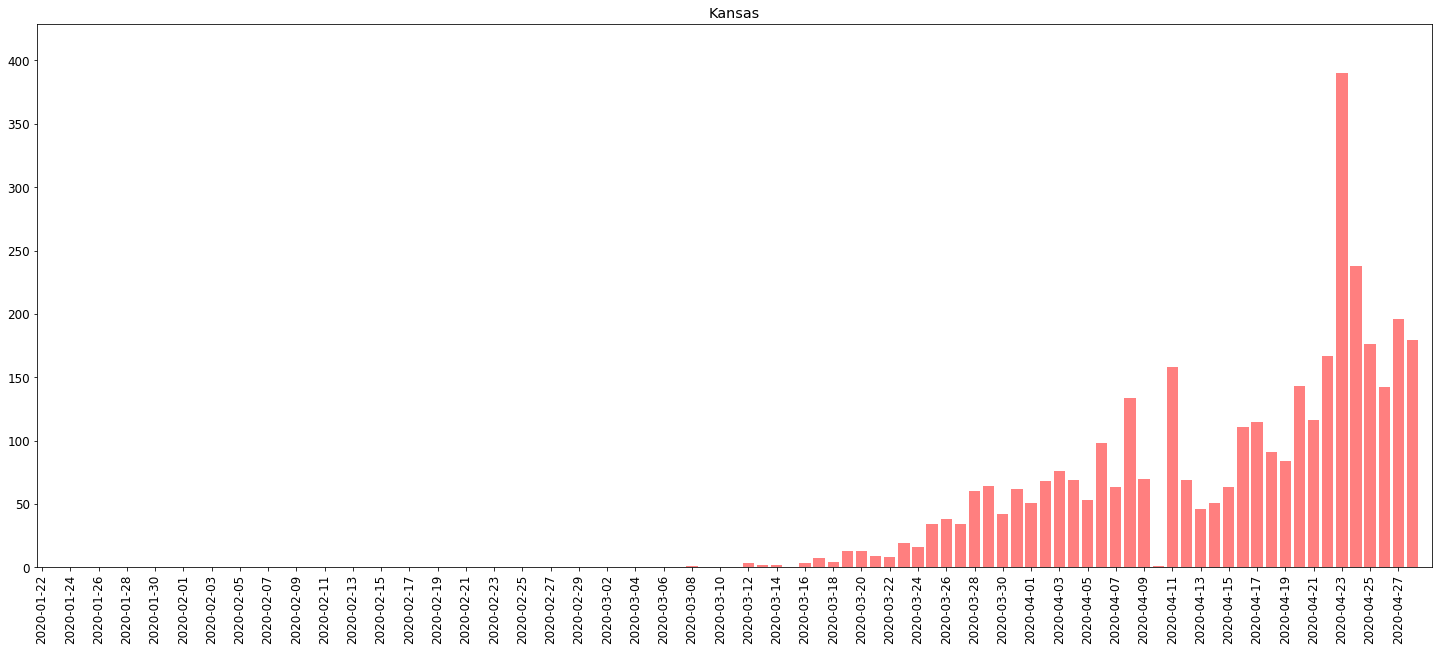

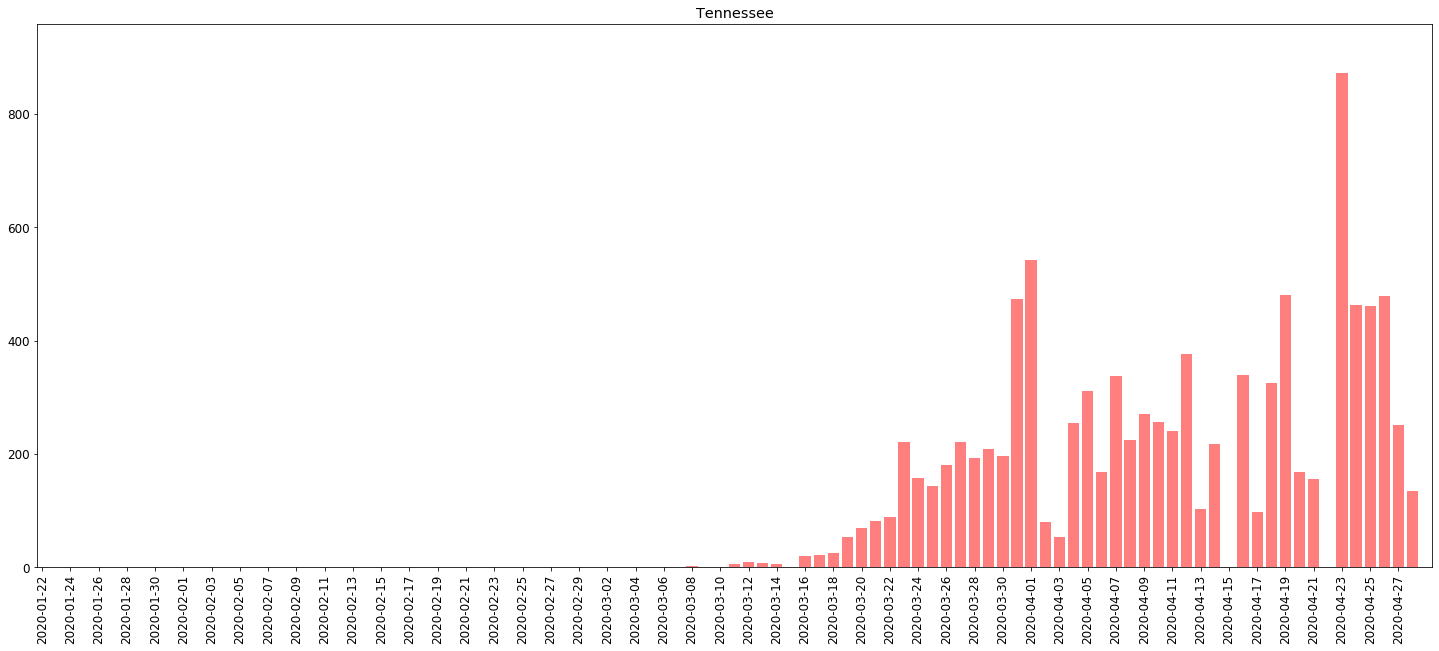

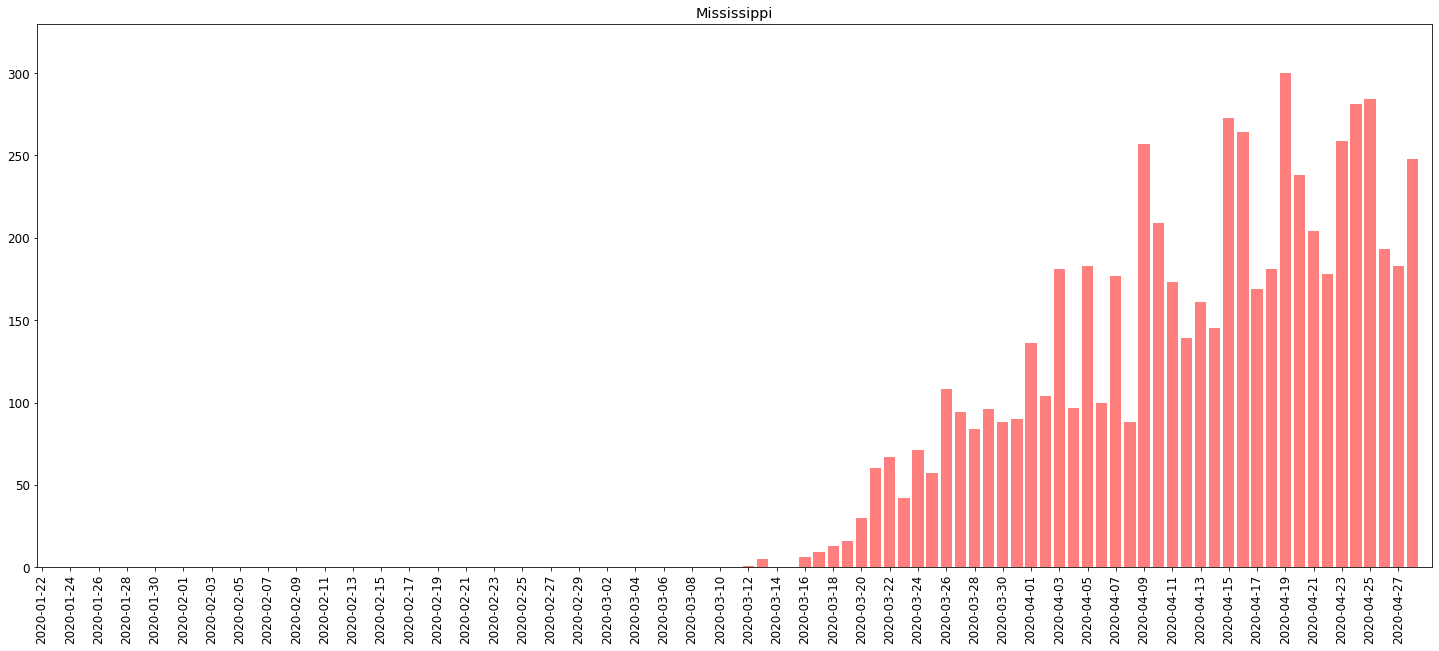

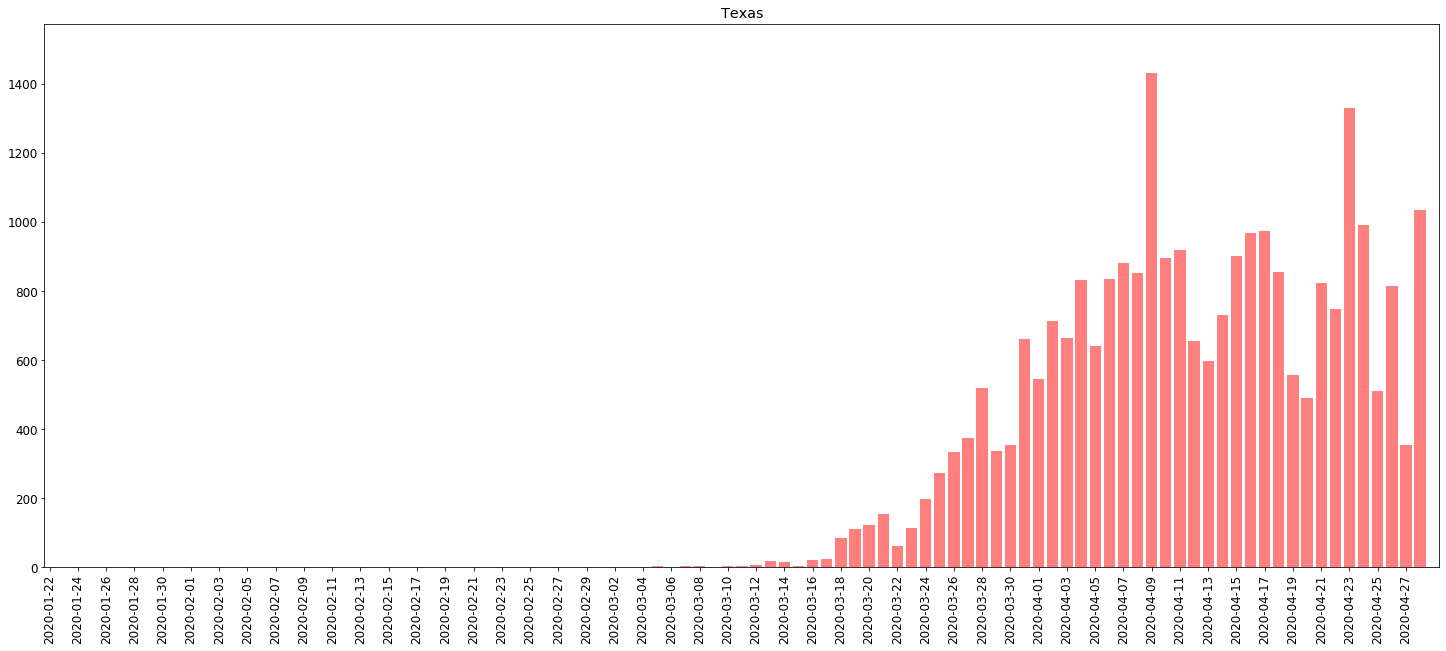

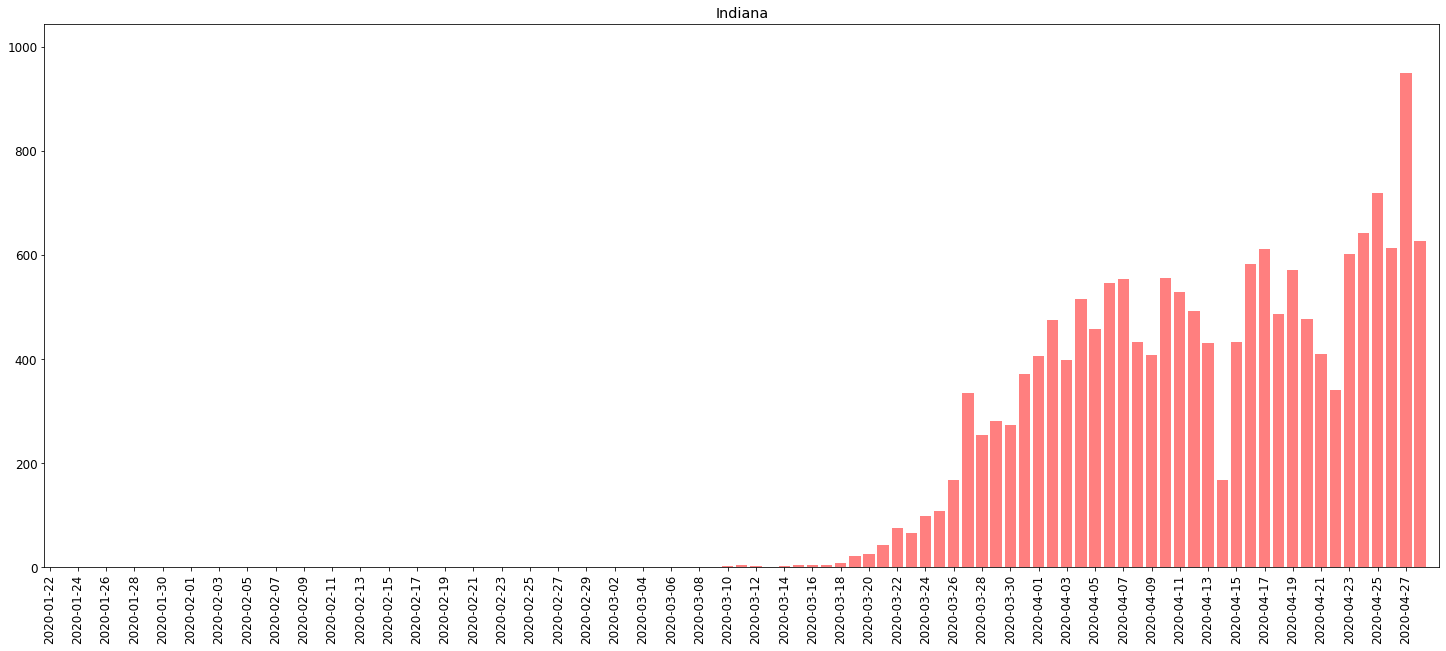

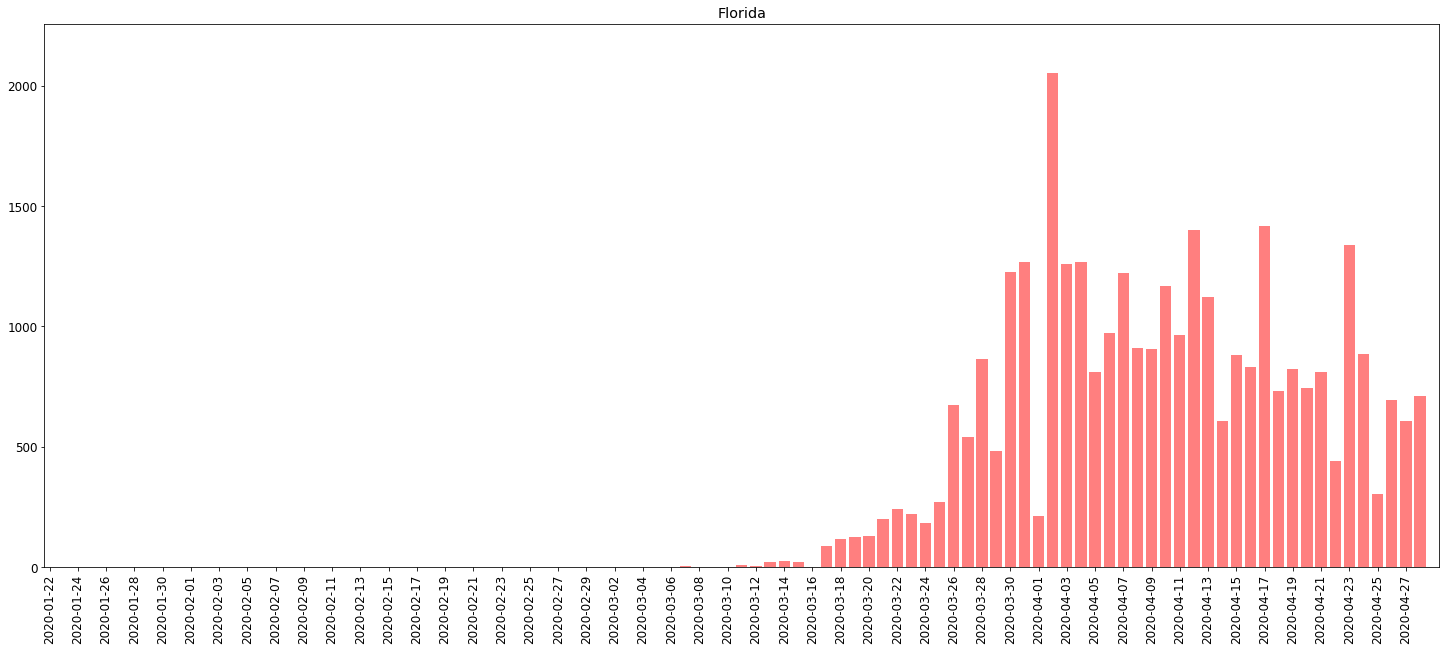

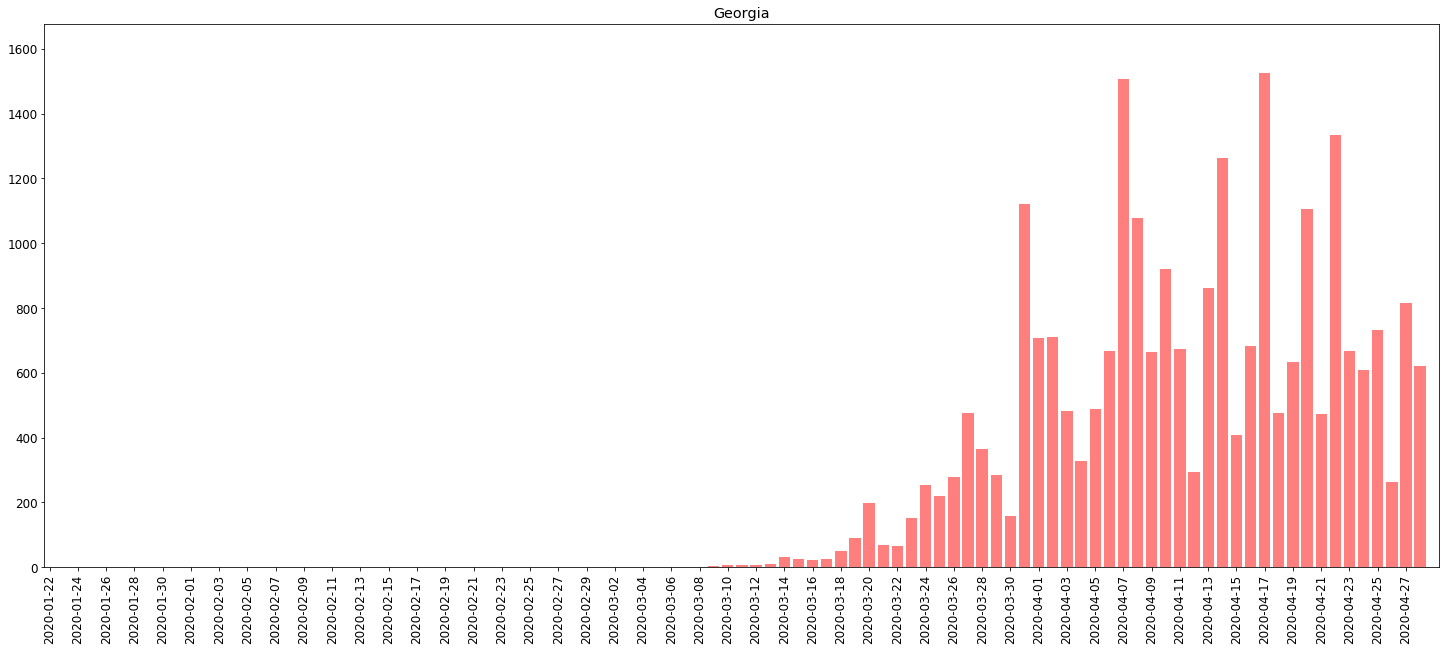

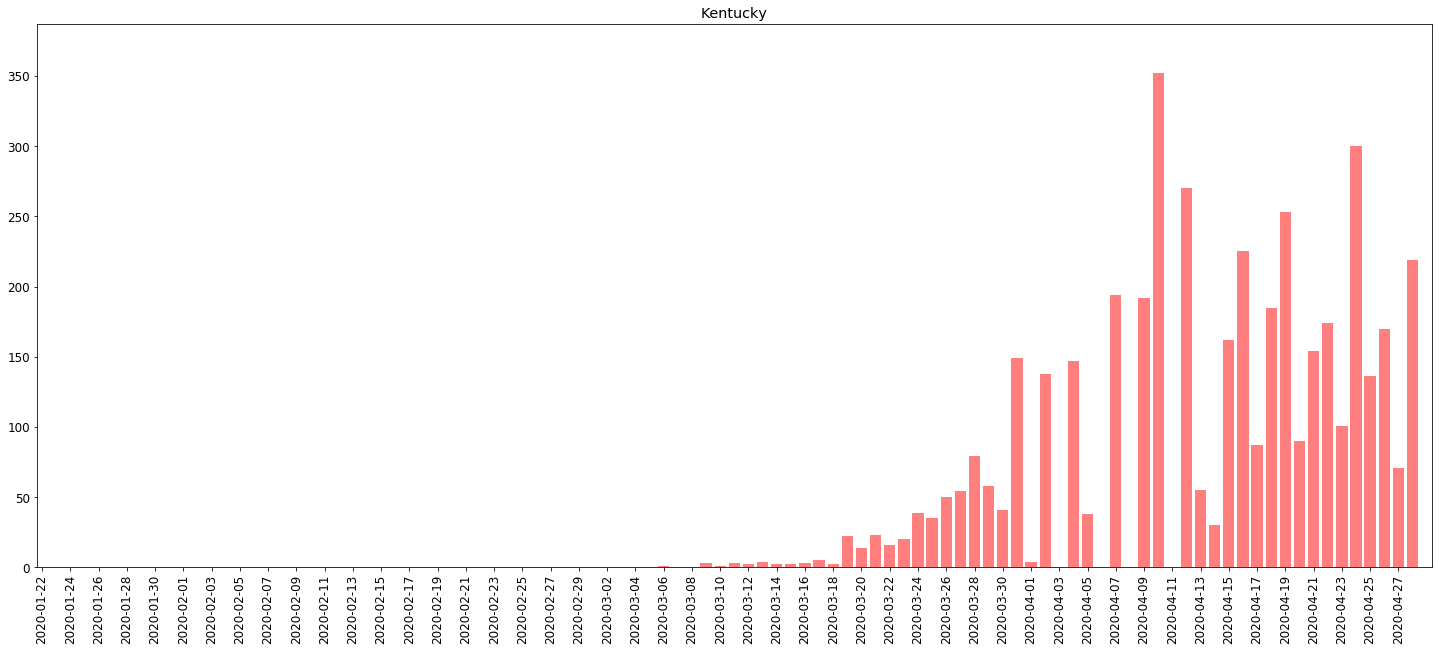

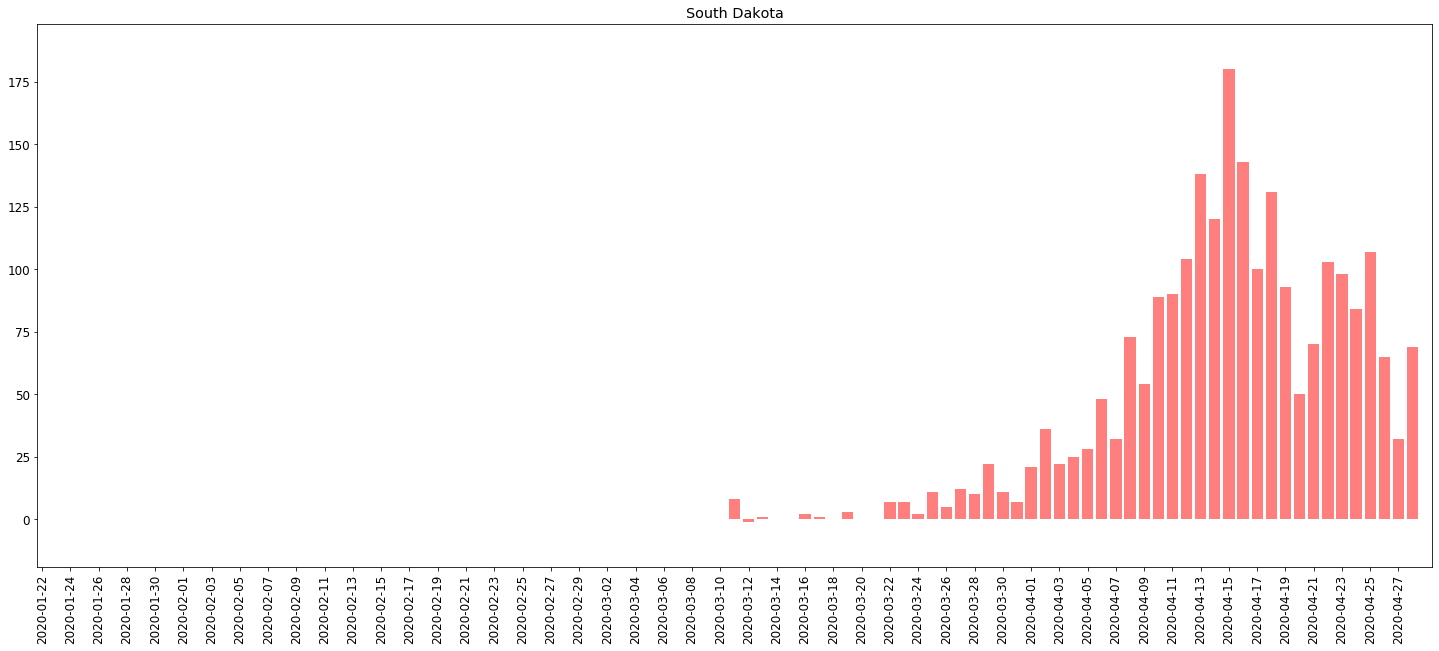

In [311]:
for state in states:
    makemask(state)

In [18]:
# Create line chart for daily change %

In [19]:
# % confirmed for top population counties
# Get max 
counties_cases = us_df.loc[us_df['Province_State']=='Texas'].groupby(['Admin2']).max()['Cases'].sort_values(ascending = False)
counties_cases.head(10)

Admin2
Harris        5827
Dallas        3240
Tarrant       2019
Travis        1464
Bexar         1334
Fort Bend      957
El Paso        829
Denton         725
Collin         676
Montgomery     562
Name: Cases, dtype: int64

In [20]:
counties_pop = us_df.loc[us_df['Province_State']=='Texas'].groupby(['Admin2']).max()['Population_Count'].sort_values(ascending = False)
counties_pop

Admin2
Harris        4713325.0
Dallas        2635516.0
Tarrant       2102515.0
Bexar         2003554.0
Travis        1273954.0
                ...    
Kenedy            404.0
King              272.0
Loving            169.0
Out of TX           NaN
Unassigned          NaN
Name: Population_Count, Length: 256, dtype: float64

In [21]:
merge_counties = pd.merge(counties_cases, counties_pop, how = 'left', on = 'Admin2')
merge_counties.head()

,Cases,Population_Count
Admin2,,
Harris,5827,4713325.0
Dallas,3240,2635516.0
Tarrant,2019,2102515.0
Travis,1464,1273954.0
Bexar,1334,2003554.0


In [22]:
# Add column : cases%pop
merge_counties['cases%pop'] = merge_counties.Cases / merge_counties.Population_Count
merge_counties

,Cases,Population_Count,cases%pop
Admin2,,,
Harris,5827,4713325.0,0.001236
Dallas,3240,2635516.0,0.001229
Tarrant,2019,2102515.0,0.000960
Travis,1464,1273954.0,0.001149
Bexar,1334,2003554.0,0.000666
...,...,...,...
King,0,272.0,0.000000
Foard,0,1155.0,0.000000
Kimble,0,4337.0,0.000000


In [23]:
# Look at MoM change by county (EXTRA)

In [24]:
# For March

mask1 = us_df['Province_State']=='Texas'
mask2 = us_df['Case_Type']=='Confirmed'
mask3 = pd.to_datetime(us_df['Date']) == '03/31/2020'
mask4 = mask1 & mask2 & mask3

countiesMar_df = us_df.loc[mask4].groupby('Admin2').max()['Cases'].sort_values(ascending = False)
countiesMar_df.head(10)

Admin2
Harris        680
Dallas        631
Tarrant       273
Travis        244
Denton        206
Bexar         168
Fort Bend     163
Collin        160
Brazoria       95
Montgomery     93
Name: Cases, dtype: int64

In [25]:
# For April

mask1 = us_df['Province_State']=='Texas'
mask2 = us_df['Case_Type']=='Confirmed'
mask3 = pd.to_datetime(us_df['Date']) == '04/28/2020'
mask4 = mask1 & mask2 & mask3

countiesApr_df = us_df.loc[mask4].groupby('Admin2').max()['Cases'].sort_values(ascending = False)
countiesApr_df.head(10)

Admin2
Harris        5827
Dallas        3240
Tarrant       2019
Travis        1464
Bexar         1275
Fort Bend      957
El Paso        829
Denton         725
Collin         676
Montgomery     562
Name: Cases, dtype: int64

In [26]:
counties_df = pd.DataFrame({'March Confirmed' : countiesMar_df,
                           'April Confirmed' : countiesApr_df,
                           'County Pop' : counties_pop})
counties_df['ttl%pop'] = counties_cases / counties_pop
counties_df['apr%pop'] = (counties_df['April Confirmed'] - counties_df['March Confirmed']) / (counties_df['County Pop'] - counties_df['March Confirmed'])
counties_df['mar%pop'] = counties_df['March Confirmed'] / counties_df['County Pop']
counties_df['aprVarmar'] = counties_df['apr%pop'] -counties_df['mar%pop']
counties_df.fillna(0, inplace = True)
counties_df.sort_values(by = 'County Pop', ascending = False)


,March Confirmed,April Confirmed,County Pop,ttl%pop,apr%pop,mar%pop,aprVarmar
Harris,680,5827,4713325.0,0.001236,0.001092,0.000144,0.000948
Dallas,631,3240,2635516.0,0.001229,0.000990,0.000239,0.000751
Tarrant,273,2019,2102515.0,0.000960,0.000831,0.000130,0.000701
Bexar,168,1275,2003554.0,0.000666,0.000553,0.000084,0.000469
Travis,244,1464,1273954.0,0.001149,0.000958,0.000192,0.000766
...,...,...,...,...,...,...,...
Kenedy,0,0,404.0,0.000000,0.000000,0.000000,0.000000
King,0,0,272.0,0.000000,0.000000,0.000000,0.000000
Loving,0,0,169.0,0.000000,0.000000,0.000000,0.000000
Out of TX,0,0,0.0,0.000000,0.000000,0.000000,0.000000


In [27]:
# Create function to run for all states

In [28]:
# sum the unique values each county's population to get total state population
tx_population = counties_pop.sum()
tx_population

28995881.0

In [ ]:
# # Add column for daily difference
# # current value - previous value
# diff_value = []
# prev_value = 0
# row_value = [item[1] for item in tx_df.iteritems()]
# for value in row_value:
#     diff_value.append(value - prev_value)
#     prev_value = value
# diff_value[88:]

In [ ]:
# tx_df2 = pd.DataFrame(tx_df)

In [ ]:
# tx_df2['Daily Diff'] = diff_value

In [ ]:
# tx_df2